In [44]:
import pandas as pd
import numpy as np
from Bio import SeqIO

from matplotlib import pyplot
from matplotlib_venn import venn2

%matplotlib inline

# Read reciprocial results

In [45]:
axpw = pd.read_csv('AX_PW_ReciprocalHits.txt', sep='\t', header=None)

axpw.columns=['q_seqid', 'q_len', 's_seqid', 's_len', 'q_frame', 'q_start', 'q_end', 's_frame', 's_start', 's_end', 'evalue', 'bitscore', 'pident', 'nident', 'length','qr_frame', 'qr_start', 'qr_end', 'sr_frame', 'sr_start', 'sr_end', 'r_evalue', 'r_bitscore', 'r_pident', 'r_nident', 'r_length']
axpw.drop(['q_frame', 's_frame', 'qr_frame', 'sr_frame', 'q_start', 'q_end', 's_start', 's_end', 'qr_start', 'qr_end', 'sr_start', 'sr_end'], axis=1, inplace=True)

In [46]:
axhs = pd.read_csv('AX_HS_ReciprocalHits.txt', sep='\t', header=None)

axhs.columns=['q_seqid', 'q_len', 's_seqid', 's_len', 'q_frame', 'q_start', 'q_end', 's_frame', 's_start', 's_end', 'evalue', 'bitscore', 'pident', 'nident', 'length','qr_frame', 'qr_start', 'qr_end', 'sr_frame', 'sr_start', 'sr_end', 'r_evalue', 'r_bitscore', 'r_pident', 'r_nident', 'r_length']
axhs.drop(['q_frame', 's_frame', 'qr_frame', 'sr_frame', 'q_start', 'q_end', 's_start', 's_end', 'qr_start', 'qr_end', 'sr_start', 'sr_end'], axis =1, inplace=True)

In [47]:
pwhs = pd.read_csv('PW_HS_ReciprocalHits.txt', sep='\t', header=None)

pwhs.columns=['q_seqid', 'q_len', 's_seqid', 's_len', 'q_frame', 'q_start', 'q_end', 's_frame', 's_start', 's_end', 'evalue', 'bitscore', 'pident', 'nident', 'length','qr_frame', 'qr_start', 'qr_end', 'sr_frame', 'sr_start', 'sr_end', 'r_evalue', 'r_bitscore', 'r_pident', 'r_nident', 'r_length']
pwhs.drop(['q_frame', 's_frame', 'qr_frame', 'sr_frame', 'q_start', 'q_end', 's_start', 's_end', 'qr_start', 'qr_end', 'sr_start', 'sr_end'], axis =1, inplace=True)

In [48]:
axpw_length = axpw['length'] - axpw['r_length']
axhs_length = axhs['length'] - axhs['r_length']
pwhs_length = pwhs['length'] - pwhs['r_length']

In [49]:
axpw_evalue = axpw['evalue'] - axpw['r_evalue']
axhs_evalue = axhs['evalue'] - axhs['r_evalue']
pwhs_evalue = pwhs['evalue'] - pwhs['r_evalue']

In [50]:
axpw_bitscore = axpw['bitscore'] - axpw['r_bitscore']
axhs_bitscore = axhs['bitscore'] - axhs['r_bitscore']
pwhs_bitscore = pwhs['bitscore'] - pwhs['r_bitscore']

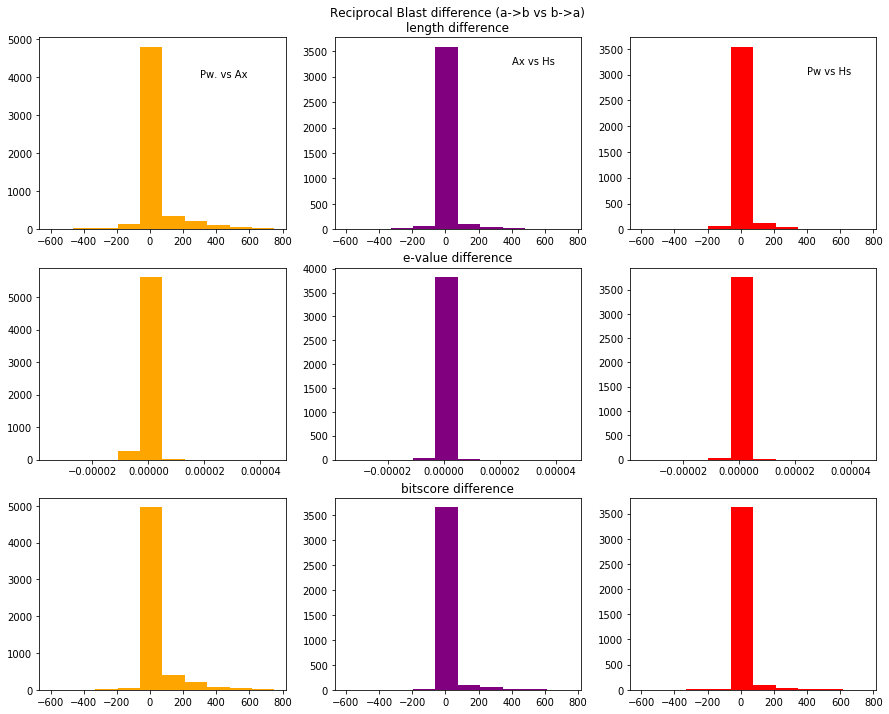

In [51]:
pyplot.figure(figsize=(15,12))
#
pyplot.subplot(331)
pyplot.hist(axpw_length, range=(-600, 750), color='orange')
pyplot.text(300, 4000, 'Pw. vs Ax')
pyplot.subplot(332)
pyplot.hist(axhs_length, range=(-600, 750), color='purple')
pyplot.text(400, 3250, 'Ax vs Hs')
pyplot.title("Reciprocal Blast difference (a->b vs b->a)\nlength difference")
pyplot.subplot(333)
pyplot.hist(pwhs_length, range=(-600, 750), color='red')
pyplot.text(400, 3000, 'Pw vs Hs')
#
pyplot.subplot(334)
pyplot.hist(axpw_evalue, range=(-0.000035, 0.000045), color='orange')
pyplot.subplot(335)
pyplot.hist(axhs_evalue, range=(-0.000035, 0.000045), color='purple')
pyplot.title("e-value difference")
pyplot.subplot(336)
pyplot.hist(pwhs_evalue, range=(-0.000035, 0.000045), color='red')
#
pyplot.subplot(337)
pyplot.hist(axpw_bitscore, range=(-600, 750), color='orange')
pyplot.subplot(338)
pyplot.hist(axhs_bitscore, range=(-600, 750), color='purple')
pyplot.title("bitscore difference")
pyplot.subplot(339)
pyplot.hist(pwhs_bitscore, range=(-600, 750), color='red')

pyplot.show()

# VENN 2

## Find orthologs

### Pw - Ax 

In [69]:
a_tot = 7014
h_tot = 6033
p_tot = 6081

#protein orthologs 
pa = axpw[['q_seqid']].copy()
pa.columns.str.strip().str.lower()
pa.drop_duplicates(keep='first', inplace=True)
# shared
p_a = pa.shape[0] 
#unique
pw_butnot_ax = p_tot - pa.shape[0]
ax_butnot_pw = a_tot - pa.shape[0] 

print("PW but not AX:", pw_butnot_ax, "Shared with AX:", p_a, "AX but not PW:", ax_butnot_pw)

PW but not AX: 1339 Shared with AX: 4742 AX but not PW: 2272


### Pw - Hs

In [70]:
#protein orthologs 
ph = pwhs[['q_seqid']].copy()
ph.columns = ph.columns.str.strip().str.lower()
ph.drop_duplicates(keep='first', inplace=True)
# shared
p_h = ph.shape[0] 
#unique
pw_butnot_hs = p_tot - ph.shape[0]
hs_butnot_pw = h_tot - ph.shape[0] 

print("PW but not HS:", pw_butnot_hs, "Shared with HS:", p_h, "HS but not PW:", hs_butnot_pw)

PW but not HS: 2560 Shared with HS: 3521 HS but not PW: 2512


### Ax - Hs 

In [71]:
#protein orthologs
ah = axhs[['q_seqid']].copy()
ah.columns.str.strip().str.lower()
ah.drop_duplicates(keep='first', inplace=True)
# shared
a_h = ah.shape[0] 
#unique
ax_butnot_hs = a_tot - ah.shape[0]
hs_butnot_ax = h_tot - ah.shape[0] 

ax_butnot_hs, a_h, hs_butnot_ax

(3467, 3547, 2486)

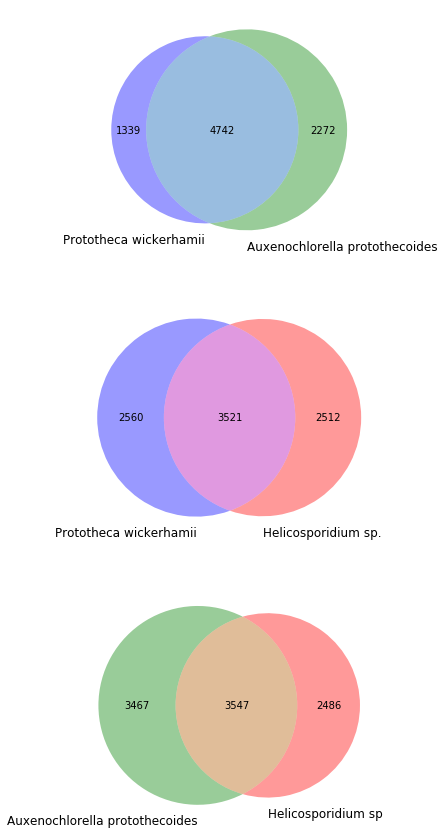

In [72]:
pyplot.figure(figsize=(10,15))
pyplot.subplot(311)
venn2(subsets= (pw_butnot_ax, ax_butnot_pw, p_a), set_labels= ('Prototheca wickerhamii', 'Auxenochlorella protothecoides', ), 
      set_colors=('blue', 'green'))
pyplot.subplot(312)
venn2(subsets= (pw_butnot_hs, hs_butnot_pw, p_h), set_labels= ('Prototheca wickerhamii', 'Helicosporidium sp.'), 
      set_colors=('blue', 'red'))
pyplot.subplot(313)
venn2(subsets= (ax_butnot_hs, hs_butnot_ax, a_h), set_labels= ('Auxenochlorella protothecoides', 'Helicosporidium sp'), 
     set_colors=('green', 'red'))

# Venn 3

In [95]:
#read all PW proteins:
all_list = []
for seq in SeqIO.parse('PW_proteins.faa', 'fasta'):
    all_list.append(seq.id)
pw_all = pd.DataFrame({'col':all_list})
pw_all.columns=['q_seqid']
pw_all.columns.str.strip().str.lower()
pw_all.drop_duplicates(keep='first', inplace=True)

#read all AX proteins:
all_list = []
for seq in SeqIO.parse('AX_proteins.faa', 'fasta'):
    all_list.append(seq.id)
ax_all = pd.DataFrame({'col':all_list})
ax_all.columns=['q_seqid']
ax_all.columns.str.strip().str.lower()
ax_all.drop_duplicates(keep='first', inplace=True)

#read all HS proteins:
all_list = []
for seq in SeqIO.parse('HS_proteins.faa', 'fasta'):
    all_list.append(seq.id)
hs_all = pd.DataFrame({'col':all_list})
hs_all.columns=['q_seqid']
hs_all.columns.str.strip().str.lower()
hs_all.drop_duplicates(keep='first', inplace=True)

pw_all.shape[0], ax_all.shape[0], hs_all.shape[0]



(6081, 7014, 6033)

## Calculate

In [96]:
# (1) PW proteins in AX and HS 

pw_in_ax_hs = ph['q_seqid'].isin(pa['q_seqid'])
n_pw_in_ax_hs = np.sum(pw_in_ax_hs)
n_pw_in_ax_hs

3215

In [97]:
# (2) PW proteins in AX butnot in HS
pw_ax_butnot_hs = -pa['q_seqid'].isin(ph['q_seqid'].values.tolist())
n_pw_ax_butnot_hs = np.sum(pw_ax_butnot_hs)
n_pw_ax_butnot_hs

1527

In [98]:
# (3) PW proteins in HS butnot in AX
pw_hs_butnot_ax = -ph['q_seqid'].isin(pa['q_seqid'].values.tolist())
n_pw_hs_butnot_ax = np.sum(pw_hs_butnot_ax)
n_pw_hs_butnot_ax

306

In [99]:
# (4) Pw proteins but not in Ax or Hs
ax_or_hs = pd.concat([pa['q_seqid'], ph['q_seqid']])
ax_or_hs = ax_or_hs.to_frame(name='q_seqid',)
ax_or_hs.columns=['q_seqid']
ax_or_hs.columns.str.strip().str.lower()
ax_or_hs.drop_duplicates(keep='first', inplace=True)

pw_butnot_ax_or_hs = -pw_all['q_seqid'].isin(ax_or_hs['q_seqid'].values.tolist())
n_pw_butnot_ax_or_hs = np.sum(pw_butnot_ax_or_hs)
n_pw_butnot_ax_or_hs

1033

In [100]:
# (5) Ax proteins butnot in Pw or Hs

# Ax - Pw protein orthologs 
ap = axpw[['s_seqid']].copy()
ap.columns = ['q_seqid']
ap.columns.str.strip().str.lower()
ap.drop_duplicates(keep='first', inplace=True)

#Ax proteins in Pw or Hs
pw_or_hs = pd.concat([ap['q_seqid'], ah['q_seqid']])
pw_or_hs = pw_or_hs.to_frame(name='q_seqid')
pw_or_hs.columns.str.strip().str.lower()
pw_or_hs.drop_duplicates(keep='first', inplace=True)

ax_butnot_pw_hs = -ax_all['q_seqid'].isin(pw_or_hs['q_seqid'].values.tolist())
n_ax_butnot_pw_hs = np.sum(ax_butnot_pw_hs)
n_ax_butnot_pw_hs

1958

In [101]:
# (6) Ax proteins in HS butnot in Pw

ax_hs_butnot_pw = -ah['q_seqid'].isin(ap['q_seqid'].values.tolist())
n_ax_hs_butnot_pw = np.sum(ax_hs_butnot_pw)
n_ax_hs_butnot_pw

314

In [102]:
# (7) Hs proteins butnot in Ax or Pw

hp = pwhs['s_seqid']
hp = hp.to_frame('q_seqid')
hp.columns.str.strip().str.lower()
hp.drop_duplicates(keep='first', inplace=True)

ha = axhs['s_seqid']
ha = ha.to_frame('q_seqid')
ha.columns.str.strip().str.lower()
ha.drop_duplicates(keep='first', inplace=True)

hp_or_ha = pd.concat([hp['q_seqid'], ha['q_seqid']])
hp_or_ha = hp_or_ha.to_frame(name='q_seqid')
hp_or_ha.columns.str.strip().str.lower()
hp_or_ha.drop_duplicates(keep='first', inplace=True)


hs_butnot_ax_pw = -hs_all['q_seqid'].isin(hp_or_ha['q_seqid'].values.tolist()) 
n_hs_butnot_ax_pw = np.sum(hs_butnot_ax_pw)
hp.size, ha.size, hp_or_ha.size, n_hs_butnot_ax_pw

(3521, 3547, 3955, 2078)

In [103]:
one = n_pw_in_ax_hs
two = n_pw_ax_butnot_hs
three = n_pw_hs_butnot_ax
four = n_pw_butnot_ax_or_hs
five = n_ax_butnot_pw_hs
six = n_ax_hs_butnot_pw
seven = n_hs_butnot_ax_pw+135

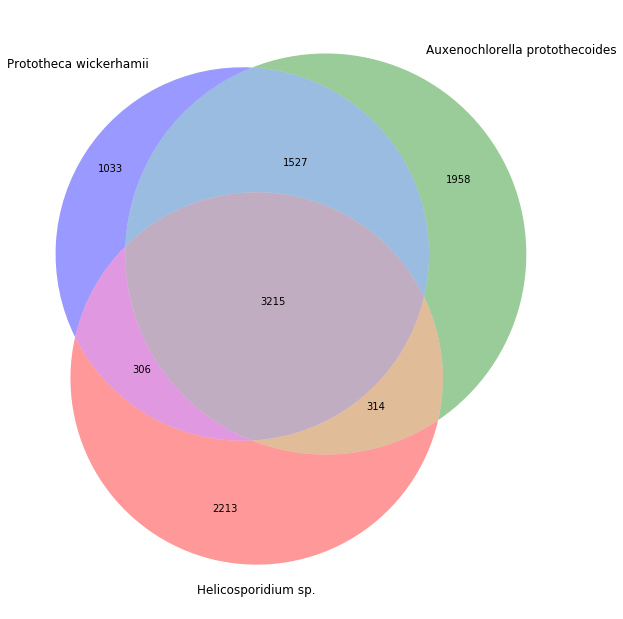

In [104]:
from matplotlib_venn import venn3
pyplot.figure(figsize=(10,15))
venn3(subsets = (four, five, two, seven, three, six, one), 
      set_labels=('Prototheca wickerhamii', 'Auxenochlorella protothecoides', 'Helicosporidium sp.'), 
     set_colors= ('b', 'g', 'r'))